In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import os

path="C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\digit-recognizer"
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
submissionPath=path+"\\sample_submission.csv"
sampleSubmissionDf= pd.read_csv(path+"\\sample_submission.csv")
#sampleSubmissionDf.head()
testDf= pd.read_csv(path+"\\test.csv")
#testDf.head()
trainDf= pd.read_csv(path+"\\train.csv")
#print(trainDf.head())

trainDf.index +=1
#trainDf.index

#trainDf.drop(columns=["label"]) #, axis=1


C:\Users\manoj\PycharmProjects\tf-tuto\data\digit-recognizer\sample_submission.csv
C:\Users\manoj\PycharmProjects\tf-tuto\data\digit-recognizer\test.csv
C:\Users\manoj\PycharmProjects\tf-tuto\data\digit-recognizer\train.csv


In [3]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainDf.drop(columns=["label"]), trainDf.label, test_size=0.2)

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)


In [4]:
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = "softmax"))

#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [5]:
y_train = np.asarray(y_train)
X_train = np.asarray(X_train)



In [6]:
model.fit(X_train, y_train, epochs=30)

Train on 33600 samples
Epoch 1/30
33600/33600 [==============================] - 6s 183us/sample - loss: 0.5031 - accuracy: 0.868458
Epoch 2/30
33600/33600 [==============================] - 3s 86us/sample - loss: 0.1457 - accuracy: 0.9571
Epoch 3/30
33600/33600 [==============================] - 3s 86us/sample - loss: 0.1148 - accuracy: 0.9651s - loss: 0.1149 - accuracy: 
Epoch 4/30
33600/33600 [==============================] - 3s 83us/sample - loss: 0.1018 - accuracy: 0.9699
Epoch 5/30
33600/33600 [==============================] - 3s 83us/sample - loss: 0.0960 - accuracy: 0.9713
Epoch 6/30
33600/33600 [==============================] - 3s 85us/sample - loss: 0.0925 - accuracy: 0.9726
Epoch 7/30
33600/33600 [==============================] - 3s 86us/sample - loss: 0.0807 - accuracy: 0.9751
Epoch 8/30
33600/33600 [==============================] - 3s 87us/sample - loss: 0.0874 - accuracy: 0.9757
Epoch 9/30
33600/33600 [==============================] - 3s 87us/sample - loss: 0.0741 -

In [11]:
#testDf = np.asarray(testDf)

testDf = testDf.values.reshape(-1,28,28,1)
testDf = np.asarray(testDf)

In [ ]:
preds = model.predict(testDf)
preds

In [ ]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
test_loss, test_acc = model.evaluate(X_test, y_test)


In [18]:
type(preds)

numpy.ndarray

In [14]:
train_x = trainDf.drop(columns=["label"])
train_y = trainDf.label
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)


In [15]:
model.fit(train_x, train_y, epochs=50)


ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (42000, 784)

In [48]:
df = pd.DataFrame(data=preds, columns=range(0,10))

In [49]:
predList = df.idxmax(axis=1)

In [50]:
submissionDf=pd.DataFrame({'Label': predList[:, ]})
submissionDf.index +=1

submissionDf["ImageId"] = submissionDf.index
submissionDf=submissionDf[["ImageId","Label"]]

In [51]:
submissionDf

,ImageId,Label
1,1,2
2,2,0
3,3,9
4,4,9
5,5,3
...,...,...
27996,27996,9
27997,27997,7
27998,27998,3
27999,27999,9


In [52]:
submissionDf.to_csv(path+"\\sample_submission.csv",sep=",",index=False)

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH="C:/Users/manoj/PycharmProjects/data/PlantPathology2020"

train_dir = os.path.join(PATH, '150X200')
train_dir = os.path.join(PATH, 'images')
validation_dir = os.path.join(PATH, '150X200')
validation_dir = os.path.join(PATH, 'images')


In [4]:
np.random.seed(25)

In [5]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
import pandas as pd
import numpy as np

In [7]:
dataPath='c:/Users/manoj/PycharmProjects/data/PlantPathology2020/'
trainImagesDf=pd.read_csv(dataPath+'/train.csv')

In [8]:
trainImagesDf

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [9]:
trainImagesDf["filename"]=trainImagesDf["image_id"]+".jpg"

In [10]:
x=np.asarray(trainImagesDf[["healthy","multiple_diseases","rust","scab"]])
options = { 0:"healthy"
           ,1:"multiple_diseases"
           ,2:"rust"
           ,3:"scab"
}
trainImagesDf["label"]=[options[np.argmax(arr)] for arr in x]
trainImagesDf["name"] = trainImagesDf["image_id"]+'.jpg'
#testImagesDf
#train_df = trainImagesDf[["image_id","label"]]
df = trainImagesDf[["name","label"]]
df.rename(columns={"name":"filename","label":"class"}, inplace=True)

C:\Users\manoj\anaconda3\envs\fastai\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df["class"]

0                    scab
1       multiple_diseases
2                 healthy
3                    rust
4                 healthy
              ...        
1816                 scab
1817              healthy
1818              healthy
1819                 rust
1820                 scab
Name: class, Length: 1821, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["class"]), df.drop(columns=["filename"]), test_size=0.2)

In [13]:
train_df=X_train
train_df["class"]=y_train
validation_df=X_test
validation_df["class"]=y_test
validation_df

,filename,class
778,Train_778.jpg,rust
1232,Train_1232.jpg,scab
1260,Train_1260.jpg,rust
1085,Train_1085.jpg,healthy
365,Train_365.jpg,healthy
...,...,...
1274,Train_1274.jpg,scab
1802,Train_1802.jpg,rust
808,Train_808.jpg,scab
968,Train_968.jpg,healthy


In [14]:
total_train = len(train_df)
total_val   = len(validation_df)

In [15]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [16]:
train_data_gen = train_image_generator.flow_from_dataframe( batch_size=batch_size,
                                                            dataframe=train_df,
                                                            directory=train_dir,
                                                            x_col="filename",
                                                            y_col="class",
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH) #, class_mode='binary'
                                                          )

Found 1456 validated image filenames belonging to 4 classes.


In [17]:
val_data_gen = validation_image_generator.flow_from_dataframe( batch_size=batch_size,
                                                            dataframe=validation_df,
                                                            directory=validation_dir,
                                                            x_col="filename",
                                                            y_col="class",
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH) #, class_mode='binary'
                                                          )

Found 365 validated image filenames belonging to 4 classes.


In [18]:
testImagesDf=pd.read_csv(dataPath+'/test.csv')
testImagesDf

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [19]:
sample_training_images, _ = next(train_data_gen)

In [20]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

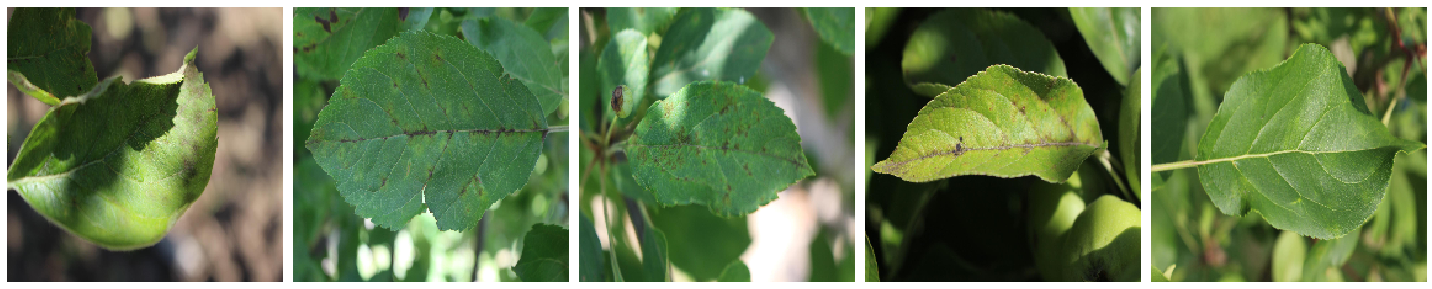

In [21]:
plotImages(sample_training_images[:5])

In [22]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [25]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 2 steps
Epoch 1/15
11/11 [==============================] - 36s 3s/step - loss: 0.7223 - accuracy: 0.7236 - val_loss: 0.5154 - val_accuracy: 0.7500
Epoch 2/15
11/11 [==============================] - 36s 3s/step - loss: 0.5210 - accuracy: 0.7500 - val_loss: 0.4947 - val_accuracy: 0.7500
Epoch 3/15
11/11 [==============================] - 36s 3s/step - loss: 0.5012 - accuracy: 0.7500 - val_loss: 0.4716 - val_accuracy: 0.7500
Epoch 4/15
11/11 [==============================] - 36s 3s/step - loss: 0.4872 - accuracy: 0.7509 - val_loss: 0.4725 - val_accuracy: 0.7529
Epoch 5/15
11/11 [==============================] - 37s 3s/step - loss: 0.4670 - accuracy: 0.7576 - val_loss: 0.4461 - val_accuracy: 0.7627
Epoch 6/15
11/11 [==============================] - 36s 3s/step - loss: 0.4226 - accuracy: 0.7779 - val_loss: 0.4138 - val_accuracy: 

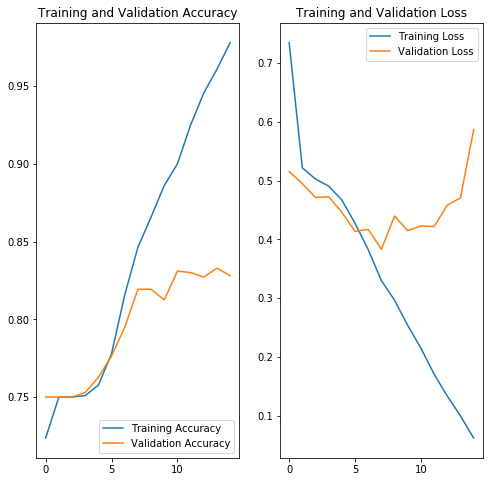

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [149]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [150]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [154]:
train_data_gen = train_image_generator.flow_from_dataframe( batch_size=batch_size,
                                                            dataframe=train_df,
                                                            directory=train_dir,
                                                            x_col="filename",
                                                            y_col="class",
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH) #, class_mode='binary'
                                                          )

Found 1456 validated image filenames belonging to 4 classes.


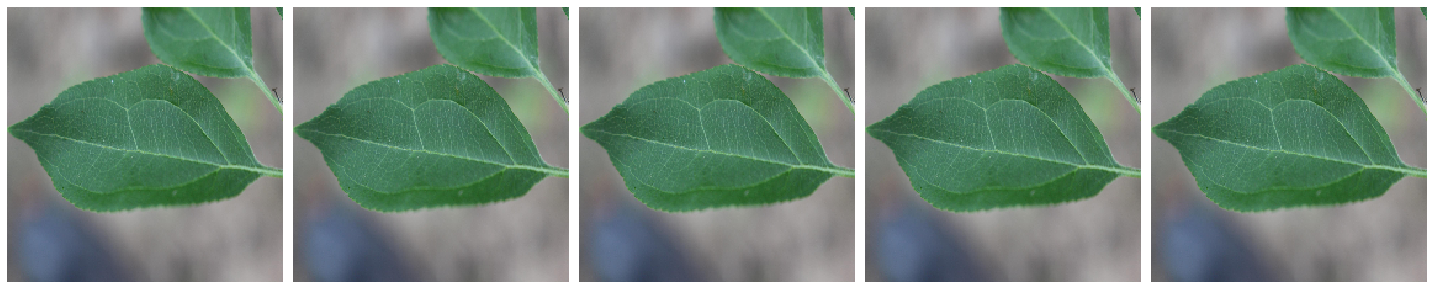

In [155]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [169]:
model_new = Sequential([
    Conv2D(64, kernel_size = (7,7), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3))
    , MaxPooling2D(pool_size=(2,2))
    , Dropout(0.4)
    , Conv2D(64, kernel_size = (5,5), padding='same', activation='relu')
    , MaxPooling2D()
    , Conv2D(64, kernel_size = (5,5), padding='same', activation='relu')
    , MaxPooling2D(pool_size=(2,2), strides=(2,2))
    , Dropout(0.4)
    , Flatten()
    , Dense(512, activation='relu')
    , Dense(4, activation = "softmax")
])
'''
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = "softmax"))

#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
'''

'\nmodel.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = \'Same\',activation =\'relu\', input_shape = (28,28,1)))\nmodel.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = \'Same\',activation =\'relu\'))\nmodel.add(keras.layers.MaxPool2D(pool_size=(2,2)))\nmodel.add(keras.layers.Dropout(0.25))\n\n\nmodel.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = \'Same\', activation =\'relu\'))\nmodel.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))\nmodel.add(keras.layers.Dropout(0.25))\n\n\nmodel.add(keras.layers.Flatten())\nmodel.add(keras.layers.Dense(256, activation = "relu"))\nmodel.add(keras.layers.Dropout(0.5))\nmodel.add(keras.layers.Dense(10, activation = "softmax"))\n\n#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)\n\nmodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metri

In [170]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 224, 224, 64)      9472      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 112, 112, 64)      102464    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 56, 56, 64)        102464    
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 28, 28, 64)      

In [158]:
epochs=200
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    #epochs=30,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 2 steps
Epoch 1/200
11/11 [==============================] - 33s 3s/step - loss: 1.5498 - accuracy: 0.7206


InvalidArgumentError:  Input to reshape is a tensor with 3276800 values, but the requested shape requires a multiple of 50176
	 [[node sequential_8/flatten_8/Reshape (defined at <ipython-input-158-cebe26c86a90>:8) ]] [Op:__inference_distributed_function_51533]

Function call stack:
distributed_function


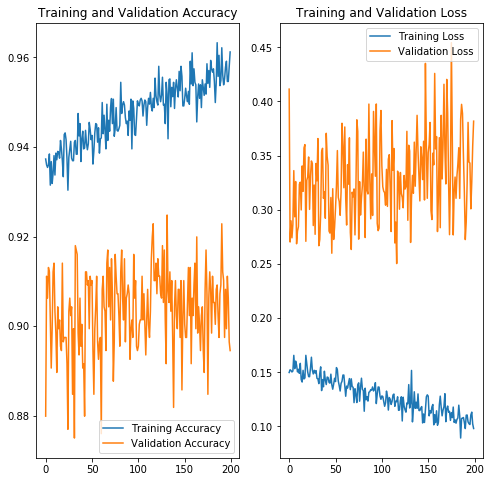

In [100]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [114]:
test_df=pd.read_csv(dataPath+'/test.csv')
test_df
test_df.rename(columns={"image_id":"filename"}, inplace=True)
test_df["filename"]=test_df["filename"]+".jpg"
test_df

,filename
0,Test_0.jpg
1,Test_1.jpg
2,Test_2.jpg
3,Test_3.jpg
4,Test_4.jpg
...,...
1816,Test_1816.jpg
1817,Test_1817.jpg
1818,Test_1818.jpg
1819,Test_1819.jpg


In [121]:
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our testing data

test_data_gen = test_image_generator.flow_from_dataframe( batch_size=batch_size,
                                                            dataframe=test_df,
                                                            directory=train_dir,
                                                            x_col="filename",
                                                            y_col=None,
                                                            class_mode=None,
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH) #, class_mode='binary'
                                                          )

Found 1821 validated image filenames.


In [143]:
predDf = model.predict(test_data_gen)

In [144]:
import os

predDf=pd.DataFrame(predDf)
predDf.rename(columns=options, inplace=True)
predDf["image_id"]=[os.path.basename(os.path.splitext(i)[0]) for i in test_data_gen.filepaths]
    
#options
submissionDf=predDf[["image_id","healthy","multiple_diseases","rust","scab"]]

In [146]:
submissionDf.to_csv("submission.202004231630.csv",index=False)

In [ ]:
layer_params=[3, 4, 6, 3]

def make_basic_block_layer(filter_num, blocks, stride=1):
    res_block = tf.keras.Sequential()
    res_block.add(BasicBlock(filter_num, stride=stride))

    for _ in range(1, blocks):
        res_block.add(BasicBlock(filter_num, stride=1))

    return res_block

In [72]:
conv1  = tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=2, padding="same", input_shape = (28,28,1))
bn1    = tf.keras.layers.BatchNormalization()
pool1  = tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2, padding="same")


In [ ]:
layer1 = make_basic_block_layer(filter_num= 64, blocks=3)
layer2 = make_basic_block_layer(filter_num=128, blocks=4, stride=2)
layer3 = make_basic_block_layer(filter_num=256, blocks=6, stride=2)
layer4 = make_basic_block_layer(filter_num=512, blocks=3, stride=2)


In [ ]:
    def __init__(self, filter_num, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same")
        self.bn1   = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same")
        self.bn2   = tf.keras.layers.BatchNormalization()
        if stride != 1:
            self.downsample = tf.keras.Sequential()
            self.downsample.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
            self.downsample.add(tf.keras.layers.BatchNormalization())
        else:
            self.downsample = lambda x: x

In [37]:
y=lambda x:x

In [38]:
y(2)

2

In [33]:
for _ in range(1, 3):
    print(_)

1
2


In [76]:
NUM_CLASSES=4

In [78]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=2, padding="same", input_shape = (28,28,3)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2, padding="same"))

filter_num=64
stride=2
#model.add(BasicBlock(filter_num=64, stride=2))
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
model.add(tf.keras.layers.BatchNormalization())

stride=1
for i in range (1,3):
    #model.add(BasicBlock(filter_num, stride=1))
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    

filter_num=128
stride=2
#model.add(BasicBlock(filter_num=128, stride=2))
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
model.add(tf.keras.layers.BatchNormalization())

stride=1
for i in range (1,4):
    #model.add(BasicBlock(filter_num, stride=1))
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())

filter_num=256
stride=2
#model.add(BasicBlock(filter_num=256, stride=2))
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
model.add(tf.keras.layers.BatchNormalization())
stride=1
for i in range (1,6):
    #model.add(BasicBlock(filter_num, stride=1))
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())

filter_num=512
stride=2
#model.add(BasicBlock(filter_num=512, stride=2))
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
model.add(tf.keras.layers.BatchNormalization())
stride=1
for i in range (1,3):
    #model.add(BasicBlock(filter_num, stride=1))
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.GlobalAveragePooling2D())    
model.add(tf.keras.layers.Dense(units=NUM_CLASSES, activation=tf.keras.activations.softmax))


TypeError: Value passed to parameter 'x' has DataType float64 not in list of allowed values: float16, bfloat16, float32

In [80]:
import tensorflow.keras as keras

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
#model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = "softmax"))

#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)        

In [52]:
import tensorflow as tf


class BasicBlock(tf.keras.layers.Layer):

    def __init__(self, filter_num, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=filter_num,
                                            kernel_size=(3, 3),
                                            strides=stride,
                                            padding="same")
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters=filter_num,
                                            kernel_size=(3, 3),
                                            strides=1,
                                            padding="same")
        self.bn2 = tf.keras.layers.BatchNormalization()
        if stride != 1:
            self.downsample = tf.keras.Sequential()
            self.downsample.add(tf.keras.layers.Conv2D(filters=filter_num,
                                                       kernel_size=(1, 1),
                                                       strides=stride))
            self.downsample.add(tf.keras.layers.BatchNormalization())
        else:
            self.downsample = lambda x: x

    def call(self, inputs, training=None, **kwargs):
        residual = self.downsample(inputs)

        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = self.bn2(x, training=training)

        output = tf.nn.relu(tf.keras.layers.add([residual, x]))

        return output

In [83]:
model = Sequential([
    Conv2D(64, kernel_size = (7,7), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3))
    , tf.keras.layers.BatchNormalization()
    , MaxPooling2D(pool_size=(2,2))
    , Dropout(0.4)
    , Conv2D(64, kernel_size = (5,5), padding='same', activation='relu')
    , tf.keras.layers.BatchNormalization()
    , MaxPooling2D()
    , Conv2D(64, kernel_size = (5,5), padding='same', activation='relu')
    , tf.keras.layers.BatchNormalization()
    , MaxPooling2D(pool_size=(2,2), strides=(2,2))
    , Dropout(0.4)
    , Flatten()
    , Dense(512, activation='relu')
    , Dense(4, activation = "softmax")
])


model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model.summary()


TypeError: Value passed to parameter 'x' has DataType float64 not in list of allowed values: float16, bfloat16, float32

In [2]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1),
                                                    input_shape=(
                                                        None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,
                                                    padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])
my_seq.summary()

TypeError: Value passed to parameter 'x' has DataType float64 not in list of allowed values: float16, bfloat16, float32

In [71]:
model=tf.keras.Sequential()

import tensorflow.keras as keras

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

#model.add(BasicBlock(filter_num=256, stride=2))

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = "softmax"))

#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()



Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_151 (Conv2D)          (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)        

In [3]:
print(tf.__version__)

2.1.0
